In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

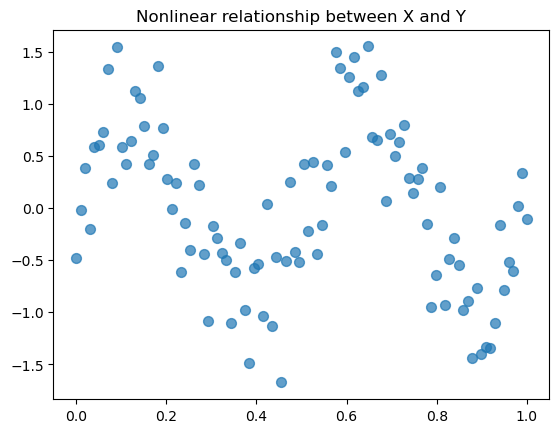

In [3]:
# Read data
myData = pd.read_csv('nonpar_data.csv')
X = myData['X']
Y = myData['Y']
plt.scatter(X, Y, marker='o', s=50, alpha=0.7)
plt.title('Nonlinear relationship between X and Y')
plt.show()

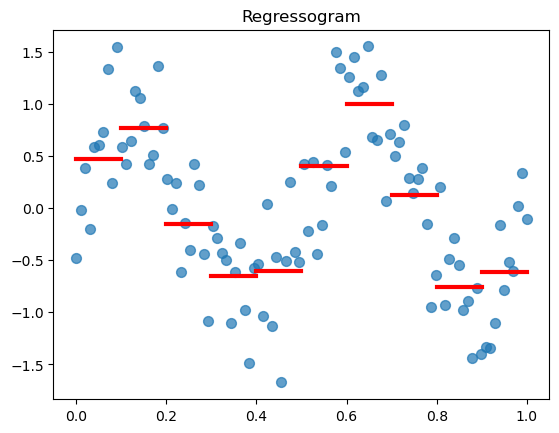

In [4]:
#########################
# Regressogram function
#########################
def regressogram(X, Y, mm, bins):
    r_hat = np.zeros(mm)
    for jj in range(mm):
        sel = np.where((X >= bins[jj]) & (X < bins[jj + 1]))[0]
        Y_hat = np.mean(Y[sel])
        r_hat[jj] = Y_hat
    return r_hat

# Regressogram plot
mm = 10
bins = np.linspace(min(X), max(X), mm + 1)
r_hat = regressogram(X, Y, mm, bins)
plt.scatter(X, Y, marker='o', s=50, alpha=0.7)
for jj in range(mm):
    plt.plot([bins[jj], bins[jj + 1]], [r_hat[jj], r_hat[jj]], color='red', linewidth=3)
plt.title('Regressogram')
plt.show()

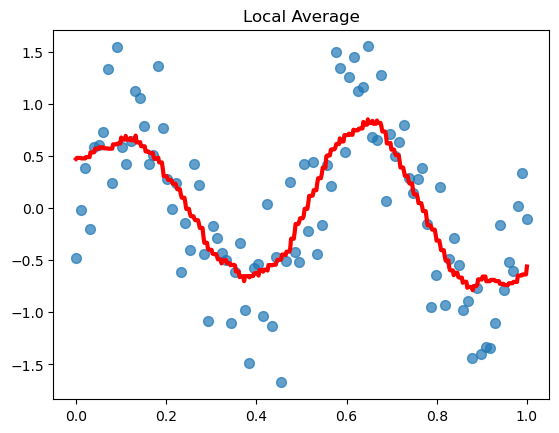

In [5]:
#########################
# Local average function
#########################
def local_average(X, Y, hh, xx):
    r_hat = np.zeros(len(xx))
    for ii in range(len(xx)):
        sel = np.where(np.abs(X - xx[ii]) <= hh)[0]
        Y_hat = np.mean(Y[sel])
        r_hat[ii] = Y_hat
    return r_hat

# Local average plot
hh = 0.1
n_xx = 500
xx = np.linspace(min(X), max(X), n_xx)
r_hat = local_average(X, Y, hh, xx)

plt.scatter(X, Y, marker='o', s=50, alpha=0.7)
plt.plot(xx, r_hat, color='red', linewidth=3)
plt.title('Local Average')
plt.show()

/Users/fabrizio/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/fabrizio/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


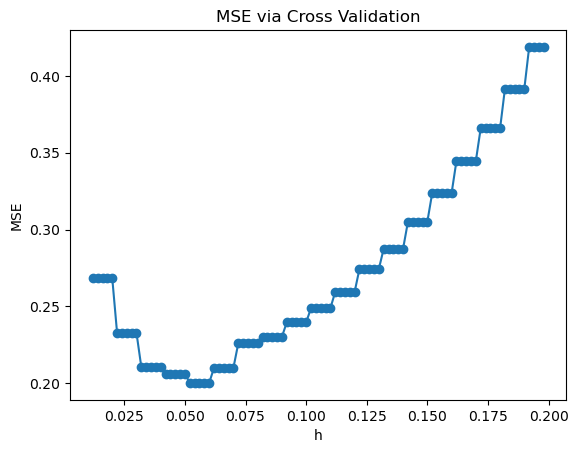

In [16]:
# Leave One Out Cross Validation
def one_CV(Xtrain, Ytrain, hh, Xval, Yval):
    r_hat = local_average(Xtrain, Ytrain, hh, Xval.reshape(1))
    MSE = (Yval - r_hat) ** 2
    return MSE

seq_h = np.arange(0.002, 0.2, 0.002)
nn = len(X)
MSE_matrix = np.empty((nn, len(seq_h)))

for ii in range(nn):
    Xtrain = np.delete(X.values, ii)
    Ytrain = np.delete(Y.values, ii)
    Xval = X.values[ii]
    Yval = Y.values[ii]

    h_index = 0
    for hh in seq_h:
        MSE_matrix[ii, h_index] = one_CV(Xtrain, Ytrain, hh, Xval, Yval)
        h_index += 1

MSE_avg = np.mean(MSE_matrix, axis=0)

plt.plot(seq_h, MSE_avg, marker='o')
plt.xlabel('h')
plt.ylabel('MSE')
plt.title('MSE via Cross Validation')
plt.show()